## **Mushroom Classification**

### Introduction

The dataset consists of 22 variables that characterize the mushrooms of the Agaricaceae and Lepiota family, classifying them as edible (e - edible) or poisonous (p - poisonous). We have a total of 8124 observations.

### Objective


In order to identify **Poisonous mushrooms**, this work proposes to expose some statistical approaches in the analysis of the studied variables and the use of the Random Forest Model to classify whether a particular mushroom can be harmful to health or not.

### Starter packages used for data visualization

In [ ]:
import pandas as pd  # Data manipulation and reading
import numpy as np # Algebra operations package
import seaborn as sns # Seaborn data visualization
from scipy.stats import chi2_contingency # Chi-square analysis for categorical variables
import matplotlib.pyplot as plt  # Data visualization - matplotlib

### setup-premilinary settings

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# Loading the data
data_mushrooms = pd.read_csv('../input/mushroom-classification/mushrooms.csv')
data_mushrooms.head(5)

Look that the variables in this analysis are only qualitatives, all in their nominal state, that is, there are no levels more important than another in each of the analyzed variables. The categories of each variable are represented by letters, this meaning was transformed into literal in order to bring an interpretation to the problem.

In [ ]:
data_mushrooms['cap-shape'] = data_mushrooms['cap-shape'].replace({ 'b':'bell','c':'conical','x':'convex', 'f':'flat', 'k':'knobbed', 's':'sunken' })
data_mushrooms['cap-surface'] =  data_mushrooms['cap-surface'].replace({'f':'fibrous','g':'grooves','y':'scaly','s':'smooth' })
data_mushrooms['cap-color'] = data_mushrooms['cap-color'].replace({'n':'brown', 'b':'buff','c':'cinnamon','g':'gray', 'r':'green', 'p':'pink','u':'purple','e':'red','w':'white','y':'yellow' })
data_mushrooms['bruises'] =data_mushrooms['bruises'].replace({'t':'bruises','f':'no' })
data_mushrooms['odor'] = data_mushrooms['odor'].replace({ 'a':'almond','l':'anise','c':'creosote','y':'fishy','f':'foul', 'm':'musty','n':'none','p':'pungent','s':'spicy' })
data_mushrooms['gill-attachment'] = data_mushrooms['gill-attachment'].replace({ 'a':'attached','d':'descending','f':'free','n':'notched' })
data_mushrooms['gill-spacing'] = data_mushrooms['gill-spacing'].replace({'c':'close','w':'crowded','d':'distant' })
data_mushrooms['gill-size'] = data_mushrooms['gill-size'].replace({ 'b':'broad','n':'narrow' })
data_mushrooms['gill-color'] = data_mushrooms['gill-color'].replace({ 'k':'black','n':'brown','b':'buff','h':'chocolate','g':'gray','r':'green','o':'orange','p':'pink','u':'purple','e':'red', 'w':'white','y':'yellow' })
data_mushrooms['stalk-shape'] = data_mushrooms['stalk-shape'].replace({ 'e':'enlarging','t':'tapering' })
data_mushrooms['stalk-root'] = data_mushrooms['stalk-root'].replace({ 'b':'bulbous','c':'club','u':'cup','e':'equal', 'z':'rhizomorphs','r':'rooted','?':'missing' })
data_mushrooms['stalk-surface-above-ring'] = data_mushrooms['stalk-surface-above-ring'].replace({ 'f':'fibrous','y':'scaly','k':'silky','s':'smooth' })
data_mushrooms['stalk-surface-below-ring'] = data_mushrooms['stalk-surface-below-ring'].replace({ 'f':'fibrous','y':'scaly','k':'silky','s':'smooth' })
data_mushrooms['stalk-color-above-ring'] = data_mushrooms['stalk-color-above-ring'].replace({ 'n': 'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange', 'p':'pink','e':'red','w':'white','y':'yellow'})
data_mushrooms['stalk-color-below-ring'] = data_mushrooms['stalk-color-below-ring'].replace({ 'n': 'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange', 'p':'pink','e':'red','w':'white','y':'yellow'})
data_mushrooms['veil-type'] = data_mushrooms['veil-type'].replace({ 'p':'partial','u':'universal' })
data_mushrooms['veil-color'] = data_mushrooms['veil-color'].replace({ 'n':'brown','o':'orange','w':'white','y':'yellow' })
data_mushrooms['ring-number'] =data_mushrooms['ring-number'].replace({ 'n':'none', 'o':'one','t':'two' })
data_mushrooms['ring-type'] = data_mushrooms['ring-type'].replace({'c':'cobwebby','e':'evanescent','f':'flaring','l':'large', 'n':'none','p':'pendant','s':'sheathing','z':'zone' })
data_mushrooms['spore-print-color'] = data_mushrooms['spore-print-color'].replace({'k':'black','n':'brown','b':'buff','h':'chocolate','r':'green', 'o':'orange','u':'purple','w':'white','y':'yellow'})
data_mushrooms['population'] = data_mushrooms['population'].replace({ 'a':'abundant','c':'clustered','n':'numerous', 's':'scattered','v':'several','y':'solitary' })
data_mushrooms['habitat'] = data_mushrooms['habitat'].replace({  'g':'grasses','l':'leaves','m':'meadows','p':'paths', 'u':'urban','w':'waste','d':'woods' })
data_mushrooms['class'] = data_mushrooms['class'].replace({ 'p':'Poisonous' , 'e':'Edible'})

In [ ]:
# Data Transformation
data_mushrooms.head(5)

### Exploratory Analysis

We want to understand the frequency of edible and poisonous mushrooms in our base, it is important to note that both categories are substantially balanced, with Edible 48% and Poisonous 52% under the total of observations.

In [ ]:
LABELS = ["Edible", "Poisonous"]
class_counts = pd.value_counts(data_mushrooms['class'], sort = True)
class_counts.plot(kind = 'bar', rot=0, color=['#3399ff','red']) #Added colors
plt.title('Edible / Poisonous count')
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("");

One of the interesting ways to identify an Edible mushroom is by the odor or even the color of its spores [1]. In the Figure below it is possible to observe different spores and / or colors of different populations of mushrooms, so it is up to the researcher to analyze these and other characteristics that can be complementary to classify whether an edible mushroom or not.

[1] https://www.wildfooduk.com/articles/how-to-tell-the-difference-between-poisonous-and-edible-mushrooms/

<img src="https://chrisdrury.co.uk/wp-content/uploads/2012/03/spore_grid_web-849x600.jpg" width="350px">

In the Figure below, it is interesting to note that the largest spore-print-color categories for poison mushrooms (Poisonous) are chocolate (chocolate) and white (white), implying that the highest frequency of poisonous mushrooms contains that coloring. Edible mushrooms (Edible) are mostly black (black) and brown (brown) in their spores, but even so there is a small existence of edible mushrooms that contain the coloration of chocolate and white spores.

In [ ]:
g = sns.catplot(x="spore-print-color", col="class", col_wrap=4,
            data=data_mushrooms,
            kind="count", height=3.5, aspect=.9)
g.set_xticklabels(rotation=45)
plt.show()


Regarding the odor of the mushroom, we see that the essential characteristic of a poisonous mushroom is that it has an unpleasant (fetid) odor, being referred to by foul. Edible mushrooms tend to have no smell at all.

In [ ]:
g = sns.catplot(x="odor", col="class", col_wrap=4,
            data=data_mushrooms,
            kind="count", height=3.5, aspect=.9)
g.set_xticklabels(rotation=45)
plt.show()


Apparently the variables that we have can discriminate well a poisonous mushroom from an edible potential, it is interesting to point out that with other variables we can have a greater gain of information on the characteristics of a mushroom, in order to classify potential poisonous mushrooms from edible.

###  Dependency analysis between qualitative variables

We want to understand how each variable is associated with each other, with the existence of dependent variables we have evidence that possibly the variables can influence each other and there is a distinction between the categories. With a **Chi-square** test we can determine this influence under a hypothesis test. The **null hypothesis** is that the variables are not associated, in other words, they are independent and the **alternative hypothesis** is that the variables are associated, or dependent.


$$\left\{\begin{matrix}
H_0: Independence
\\ 
H_1: Dependency
\end{matrix}\right.$$

In [ ]:
# Determining missing values 
data_mushrooms.isnull().values.any() # There is possibly a category of missing value that differs from none.

In [ ]:
cols = list(data_mushrooms.columns) # List of columns

obs =[] # Keeping the observed matrix..
chi_square = [] # calculated p-value
corr = pd.DataFrame()
k = 0

for j in cols:
    for i in cols:
        obs.append(pd.crosstab(data_mushrooms[j],data_mushrooms[i]))
        aux = chi2_contingency(observed= pd.crosstab(data_mushrooms['class'],data_mushrooms[i])) # Matriz de contigência para cada par (n,m) de variáveis
        chi_square.append(aux[1])
    corr[j] = chi_square
    chi_square = []
    k = k + 1

As shown in the Figure below, represented by p-values from the Chi-square test, we see that the **p-value** of greater intensity is the variable **veil-type** under all other variables that we have, that is , we have evidence that we can accept $H_0$ under a significance level of $\ alpha =$ 5%. Therefore, this variable is independent and there is no direct association between it and the other variables, so by preference it will be removed from the model that will be adjusted.

In [ ]:
corr.index = cols
corr = round(corr, 2)
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
data_mushrooms['veil-type'].value_counts()

Another interesting point is that we have a lot of missing information in the stalk-root variable, there is an information loss of 30%, so to avoid problems with a bias that we can put in the model it will be excluded.

In [ ]:
data_mushrooms['stalk-root'].value_counts() # 30% missing values = ?

In [ ]:
data_mushrooms.drop(['veil-type','stalk-root'], axis=1, inplace = True)

### Data modeling


Based on the previous analyzes, we have all available information that will be used in the proposed model. As an experimental form, we have a **class** developed for **FeatureUnion**, the purpose of this class is to summarize the frequencies of the categories of each variable in the data set, and to transform categories with low frequency **(Based on a 10% percertil - Customized)** in the **others** category (Group), so that we can reduce the variation of the categories of variables in our data set.

In [ ]:
from sklearn.base import BaseEstimator #Packages needed for development
from sklearn.base import TransformerMixin

class LowFrequency():
    
    def __init__(self):
        pass

    def fit(self, X,y=None):
        return self
    
    def transform(self, X,y=None):
        
        X_ = X.copy()
        
        def transf_low_freq(df, col, K):

            SIZE = len(df)

            freq_col = df[col].value_counts()/SIZE # frequency calculation
            quantile = freq_col.quantile(q=K) #custom percentile

            less_freq_col = freq_col[freq_col <= quantile]
            df.loc[df[col].isin(less_freq_col.index.tolist()), col] = "others" # Categoria outros.
 
            return (df)

        list_cols = list(X_.columns)

        for item in list_cols:
            transf_low_freq(X_, item, K = 0.1)
        
        return(X_)


### Packages used for the proposed model


The proposed model will be Random Forest for this work, and the main reasons for having used Random Forest is because it is a **nonparametric** model and brings good results in the market today, in addition to being less sensitive to outliers.

In [ ]:
# Pipeline libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Template packages
from sklearn.ensemble import RandomForestClassifier 

### Transformation of Variables using FeatureUnion and OneHotEncoder / LabelEnconder

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion

le = LabelEncoder()
X = data_mushrooms.drop('class', axis = 1)
list_cols = list(X.columns)

# Using featureUnion, using my custom function
union = FeatureUnion([("lfreq", LowFrequency())])

# Features and transformation
X = union.fit_transform(X)
X = pd.DataFrame(X, columns=list_cols)
X = pd.get_dummies(X, columns = X.columns)

# Class 
y = data_mushrooms['class'].values
y = le.fit_transform(y)

In the Figure below, we see the division of our data set in training and testing, the training base will serve us to train the model **(Using cross-validation K = 10 and grid search)** and adjust the best hyperparameters to infer in future classifications.

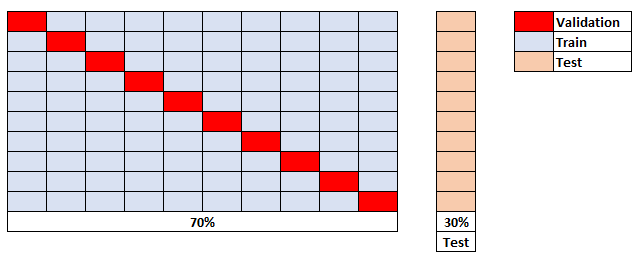

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020) # Hould-out

**Note:** We do not use **lowFrequency ()** (**My personalized class**) and **OnehotEnconder()** in **Pipeline** to not have problems with the number of training base columns be different from the test, but if we want to use an entire base there is no problem using the **custom function** and **OnehotEnconder**, but with this we can have possible overfitting contingencies.

### Model Application

#### Random Forest

In order to capture the best model for this data set, this work proposes the use of GridSearch to be able to tune the model and find the best hyperparameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

pipe_rf = Pipeline( steps = [('rf',RandomForestClassifier(random_state=2020))]) 

param_grid_rf = {'rf__criterion': ["gini", "entropy"], 
                  'rf__n_estimators': [50, 100, 150],
                  'rf__max_depth': range(0,7),
                  'rf__max_features': [5, 7, 10, 15],
                  'rf__min_samples_split' : [0.005, 0.08]}

In [ ]:
grid_rf = GridSearchCV(pipe_rf, 
                    param_grid=param_grid_rf, 
                    cv=10, # CV = 10
                    verbose = 2,
                    scoring='accuracy', 
                    n_jobs = -1)

grid_rf.fit(X_train, y_train)

#### Best Model

As hyperparameters of the best model we have:
* The best criterion for dividing the tree is Entropy.
* Maximum depth of each tree is at most up to 6.
* Minimum number of sample divisions on each sheet is 0.005.
* Number of estimators (Trees) used is size 150.
* Maximum number of features in each adjusted tree is 15.

In [ ]:
# Final Model
grid_rf.best_estimator_

### Variables of Model Importance

It is interesting to note that the proposed model generates the variables that have the greatest impact on the classification between a poisonous mushroom and a non-poisonous one, we see from the Figure below **(Top 10 most important variables)**, that the most important variable is **odor in category none (no smell)** and the second variable is **odor foul (Fetid)** corroborating previous exploratory analyzes.

In [ ]:
feat_importances = pd.Series(grid_rf.best_estimator_.named_steps["rf"].feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh');

### Prediction of the generated Model


In this step, in view of the trained model, we will classify the observations based on my test base (30%) of the edible poisonous mushrooms.

In [ ]:
ypred = grid_rf.predict(X_test) # Using the test base

In [ ]:
from sklearn.metrics import confusion_matrix
M_confusao = confusion_matrix(y_test, ypred)

# Confusion matrix plot
ax= plt.subplot()
sns.heatmap(M_confusao, annot=True, ax = ax, annot_kws={"size": 10},fmt=".0f");
ax.set_xlabel('Predict');ax.set_ylabel('Real'); 
ax.set_title('Confusion Matrix'); 
plt.grid(False)
ax.xaxis.set_ticklabels(['Edible', 'Poisonous']); ax.yaxis.set_ticklabels(['Edible', 'Poisonous']);

In [ ]:
# Table of classification measures in both classes 0 = Edible, 1 = Poisonous
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred, digits=5))

### Curva ROC - AUC

In [ ]:
# Generated ROC AUC curve

import sklearn.metrics as metrics

y_pred_proba = grid_rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Conclusion


According to the previous results we see that the model had a great performance, we have an AUC of approximately 1 and we had as a result of **accuracy** of **99.95%**. In addition, the **recall** and **precision** are considerably high even when validating on the test basis (30%), that is, the model proposed by this work is effective, being a possible model that we can use in classification of a poisonous mushroom and an edible one.